In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras

In [ ]:
#load the data
from numpy import load
names=['gamma_image_moved', 'electron_image', 'proton_image', 'helium_image', 'nitrogen_image', 'iron_image', 'silicon_image']
dset=[]
for i in range (7):
    dset.append(load('file/'+names[i]+'.npy'))

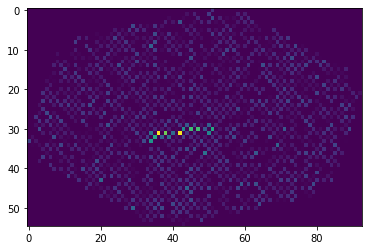

In [13]:
# Plot a image from any particle
plt.imshow(dset[3][46], interpolation='none',aspect='auto')#,cmap=plt.cm.binary
fig_size = plt.rcParams["figure.figsize"]
plt.show()

# split data

In [14]:
#create the targets
target0=np.zeros(dset[0].shape[0]) #this is gamma
target1=np.ones(dset[1].shape[0]+dset[2].shape[0]+dset[3].shape[0]+dset[4].shape[0]+dset[5].shape[0]+dset[6].shape[0])
target=np.concatenate((target0, target1), axis=0)
#put the dataset together
data=np.concatenate((dset[0],dset[1],dset[2],dset[3],dset[4],dset[5],dset[6]),axis=0)

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=3)  

In [16]:
# input image dimensions
imgRows, imgCols = 55, 93
numChannels=1
samples=X_train.shape[0]
numClasses=2

x_train=X_train
x_test=X_test

# #to put  the channels at the beginning
# x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
# x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
# input_shape = (1, img_rows, img_cols)

#to put  the channels at the end
x_train = x_train.reshape(x_train.shape[0], imgRows, imgCols, numChannels)
x_test = x_test.reshape(x_test.shape[0], imgRows, imgCols, numChannels)
input_shape = (imgRows, imgCols, numChannels)

# convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, numClasses)
y_test_c = keras.utils.to_categorical(y_test, numClasses)


# Model 1: FC NN

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(numClasses, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
%%time
hist=model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test)) 

Epoch 1/30
693/693 [==============================] - 3s 5ms/step - loss: 0.0999 - accuracy: 0.9728 - val_loss: 0.0568 - val_accuracy: 0.9847
Epoch 2/30
693/693 [==============================] - 3s 4ms/step - loss: 0.0535 - accuracy: 0.9856 - val_loss: 0.0555 - val_accuracy: 0.9845
Epoch 3/30
693/693 [==============================] - 3s 4ms/step - loss: 0.0488 - accuracy: 0.9866 - val_loss: 0.0556 - val_accuracy: 0.9850
Epoch 4/30
693/693 [==============================] - 3s 5ms/step - loss: 0.0448 - accuracy: 0.9879 - val_loss: 0.0502 - val_accuracy: 0.9868
Epoch 5/30
693/693 [==============================] - 3s 5ms/step - loss: 0.0402 - accuracy: 0.9887 - val_loss: 0.0485 - val_accuracy: 0.9875
Epoch 6/30
693/693 [==============================] - 3s 5ms/step - loss: 0.0381 - accuracy: 0.9896 - val_loss: 0.0521 - val_accuracy: 0.9886
Epoch 7/30
693/693 [==============================] - 3s 5ms/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 0.0523 - val_accuracy: 0.9870
Epoch 

In [22]:
val_loss, val_acc = model.evaluate(X_test, y_test)
# print(val_loss)
print(val_acc)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

174/174 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9910
0.9909731149673462
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[[2413   11]
 [  39 3076]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2424
         1.0       1.00      0.99      0.99      3115

    accuracy                           0.99      5539
   macro avg       0.99      0.99      0.99      5539
weighted avg       0.99      0.99      0.99      5539



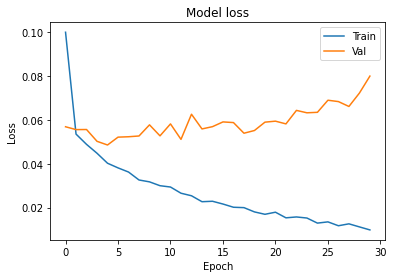

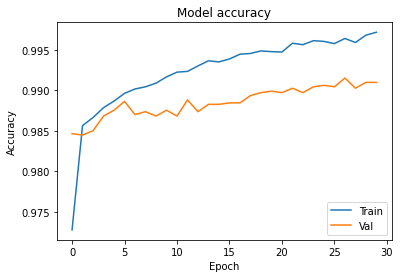

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# model 2: CNN

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_model(padding='same',stride=2,pool=2,filters=64,kernel=5,hidden_layers=2,neurons=20,optimizer='Adadelta',
                 learn_rate=0.001, init_mode='glorot_normal', activation='relu', dropout_rate=0.4,
                 weight_constraint=None,weight_regularizer=None, batchn=0,conv=2, n_filters=2):#parameters here are default

    # initialize the model
    model = Sequential()                                                                       

    for i in range (conv):
        num=int(round(filters*(2**(i-1))))
        for i in range (n_filters):
              model.add(Conv2D(num, kernel, padding=padding,activation=activation,kernel_initializer=init_mode,kernel_constraint=weight_constraint,kernel_regularizer=weight_regularizer))
        model.add(MaxPooling2D(pool_size=(pool, pool), strides=(stride, stride)))
        # model.add(Dropout(dropout_rate))
    # define the first FC => ACTIVATION layers
    model.add(Flatten())
    if (batchn==1):
        model.add(BatchNormalization())     
    model.add(Dropout(dropout_rate)) 
    for i in range(hidden_layers):
        model.add(Dense(neurons,kernel_initializer=init_mode,  activation=activation,kernel_regularizer=weight_regularizer)) 
        if (batchn==1):
            model.add(BatchNormalization())    #, use_bias=False
        model.add(Dropout(dropout_rate)) 
    # lastly, define the soft-max classifier
    model.add(Dense(numClasses, activation='softmax'))

    if (optimizer=='SGD'):
        optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    elif (optimizer=='RMS'):
        optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    elif (optimizer=='Adagrad'):
        optimizer=keras.optimizers.Adagrad(learning_rate=0.01)
    elif (optimizer=='Adadelta'):
        optimizer=keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
    elif (optimizer=='Adamax'):
        optimizer=keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Nadam'):
        optimizer=keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Adam'):
        optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])              

    return model


Using TensorFlow backend.


In [25]:
shape=x_train.shape
model=create_model()
model.build(shape) 
model.summary()
model=create_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (22155, 55, 93, 32)       832       
_________________________________________________________________
conv2d_2 (Conv2D)            (22155, 55, 93, 32)       25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (22155, 27, 46, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (22155, 27, 46, 64)       51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (22155, 27, 46, 64)       102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (22155, 13, 23, 64)       0         
_________________________________________________________________
flatten_1 (Flatten)          (22155, 19136)           

In [26]:
%%time
history=model.fit(x_train, y_train, epochs=70,batch_size=128, validation_data=(x_test, y_test))

Train on 22155 samples, validate on 5539 samples
Epoch 1/70
22155/22155 [==============================] - 26s 1ms/step - loss: 0.3315 - accuracy: 0.8379 - val_loss: 0.1080 - val_accuracy: 0.9733
Epoch 2/70
22155/22155 [==============================] - 20s 907us/step - loss: 0.1171 - accuracy: 0.9694 - val_loss: 0.0741 - val_accuracy: 0.9810
Epoch 3/70
22155/22155 [==============================] - 20s 906us/step - loss: 0.0987 - accuracy: 0.9766 - val_loss: 0.0827 - val_accuracy: 0.9774
Epoch 4/70
22155/22155 [==============================] - 20s 907us/step - loss: 0.0924 - accuracy: 0.9791 - val_loss: 0.0796 - val_accuracy: 0.9789
Epoch 5/70
22155/22155 [==============================] - 20s 908us/step - loss: 0.0825 - accuracy: 0.9805 - val_loss: 0.0564 - val_accuracy: 0.9852
Epoch 6/70
22155/22155 [==============================] - 20s 907us/step - loss: 0.0795 - accuracy: 0.9829 - val_loss: 0.0661 - val_accuracy: 0.9838
Epoch 7/70
22155/22155 [==============================] - 2

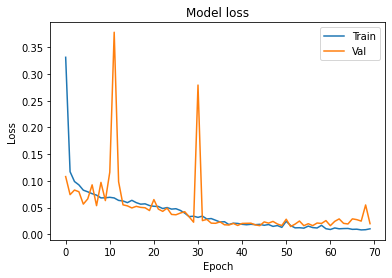

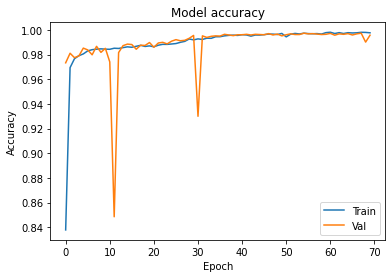

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
val_loss, val_acc = model.evaluate(x_test, y_test)
# print(val_loss)
print(val_acc)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

5539/5539 [==============================] - 3s 465us/step
0.9956670999526978
[[2422    2]
 [  22 3093]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2424
         1.0       1.00      0.99      1.00      3115

    accuracy                           1.00      5539
   macro avg       1.00      1.00      1.00      5539
weighted avg       1.00      1.00      1.00      5539



In [ ]:
#SAVE RESULTS
history = pd.DataFrame(history.history)
history.to_csv('history/history_gamma_vs_all.csv', index=False)
# #LOAD RESULTS
# import pandas as pd
# import csv
# history = pd.read_csv('history/history.csv', delimiter=',')

# SAVE THE MODEL
# model.save('model/all_all_2.model')
# #Load it back:
# model = tf.keras.models.load_model('model/all_all_2.model')

# Results

In [29]:
class_names = ['gamma', 'other']

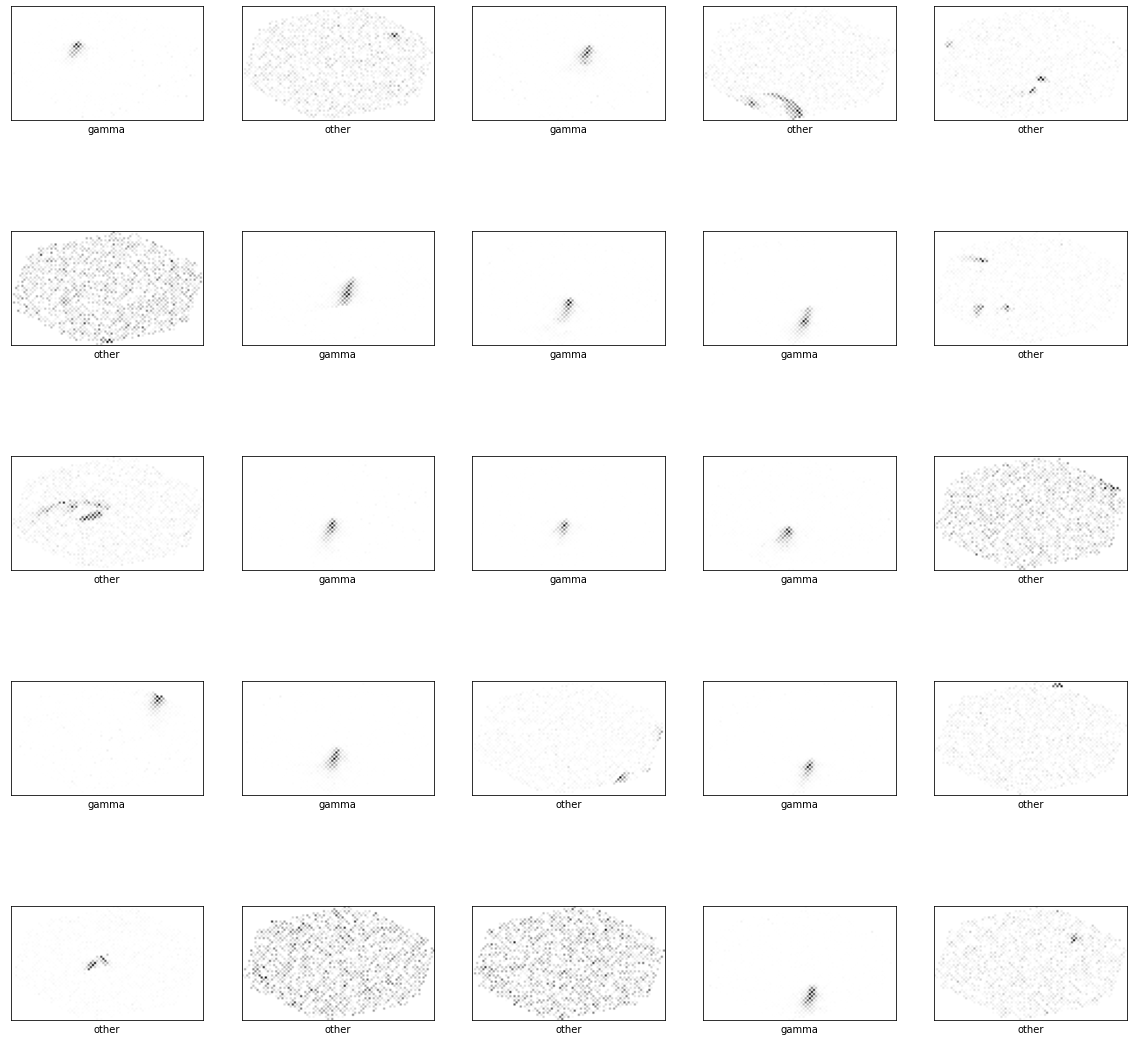

In [30]:
#show images in general

y_train=y_train.astype(int)
y_test=y_test.astype(int)
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [31]:
predictions = model.predict(x_test)
print(predictions[0])
np.argmax(predictions[0])
y_pred = model.predict_classes(x_test)

[4.9385816e-19 1.0000000e+00]


In [32]:
#define a function to create images that show classification


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)#, cmap=plt.cm.binary

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [33]:
#For instance, here I can select wrong samples  for a certain praticle

index=np.where((y_test==0)&(y_pred!=y_test)) [0]
index2=np.where(y_test==2)[0]
# index=np.concatenate([index1,index2])
index=np.sort(index)
incorrect = np.where(y_pred!=y_test)[0]
correct = np.where(y_pred==y_test)[0]
len(index)

2

ValueError: ignored

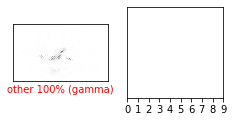

In [34]:
num_rows = 35
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[index][i], y_test[index], X_test[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[index][i],  y_test[index])
plt.tight_layout()
plt.show()